# **EXERCISE - 1**

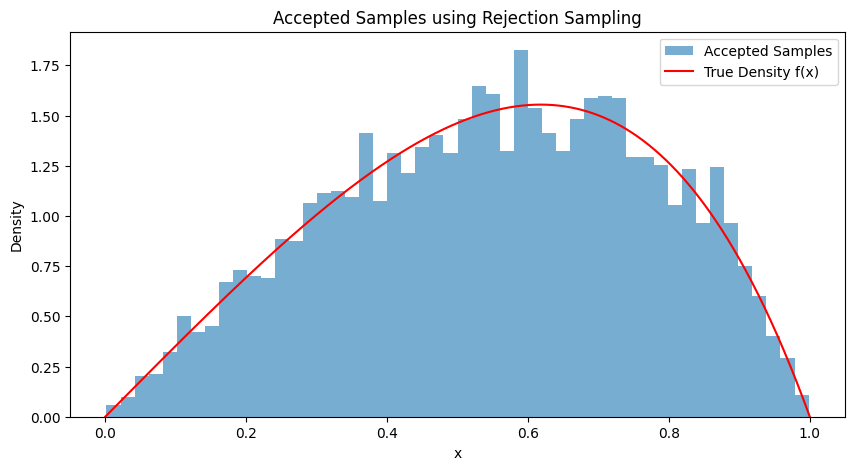

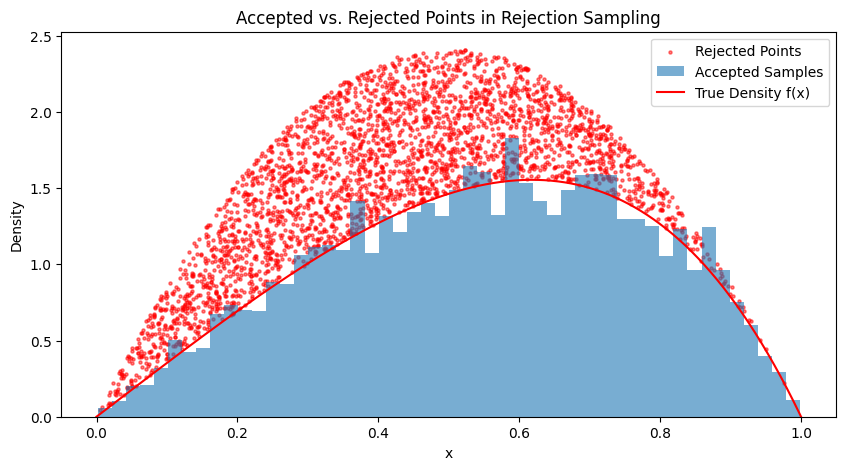

Percentage of rejected points: 37.70%


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x * (1 - x) * np.exp(x)) / (3 - np.exp(1))

alpha, beta_param = 2, 2

def h(x):
    return 6 * x * (1 - x)

# constant c
c = np.exp(1) / (6 * (3 - np.exp(1)))

def rejection_sampling_visualized(n_samples):
    accepted_samples = []
    rejected_samples_x = []
    rejected_samples_y = []

    total_generated = 0

    while len(accepted_samples) < n_samples:
        x = np.random.beta(alpha, beta_param)  # Sample from Beta(2,2)
        u = np.random.uniform(0, 1)  # Uniform(0,1) for acceptance step
        threshold = f(x) / (c * h(x))  # Acceptance threshold

        total_generated += 1

        if u <= threshold:
            accepted_samples.append(x)
        else:
            rejected_samples_x.append(x)
            rejected_samples_y.append(u * c * h(x))

    rejection_rate = ((total_generated - n_samples) / total_generated) * 100
    return np.array(accepted_samples), np.array(rejected_samples_x), np.array(rejected_samples_y), rejection_rate

# samples
n_samples = 5000
accepted, rejected_x, rejected_y, rejection_rate = rejection_sampling_visualized(n_samples)


x_plot = np.linspace(0, 1, 1000)

plt.figure(figsize=(10, 5))
plt.hist(accepted, bins=50, density=True, alpha=0.6, label="Accepted Samples")

plt.plot(x_plot, f(x_plot), 'r-', label="True Density f(x)")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Accepted Samples using Rejection Sampling")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(rejected_x, rejected_y, color='red', s=5, alpha=0.5, label="Rejected Points")
plt.hist(accepted, bins=50, density=True, alpha=0.6, label="Accepted Samples")

# True density function f(x)
plt.plot(x_plot, f(x_plot), 'r-', label="True Density f(x)")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Accepted vs. Rejected Points in Rejection Sampling")
plt.show()

print(f"Percentage of rejected points: {rejection_rate:.2f}%")


The histogram of accepted samples aligns well with the true density function, confirming the effectiveness of rejection sampling.

The percentage of rejected points is 37.70%

# **EXERCISE - 2**

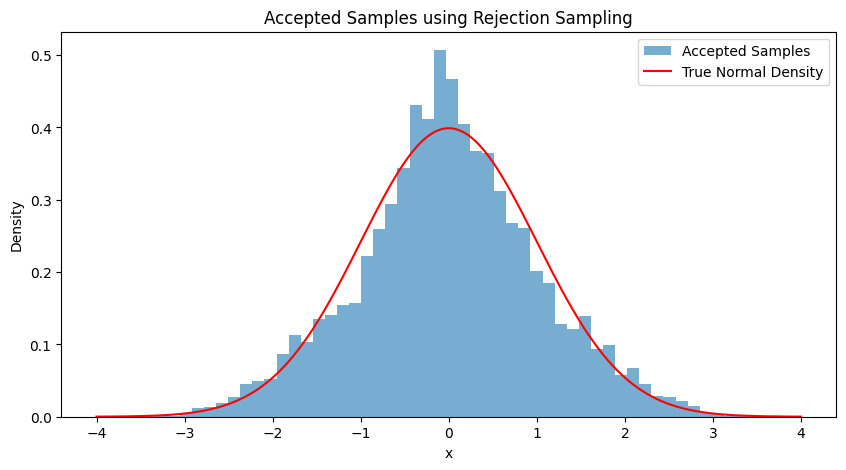

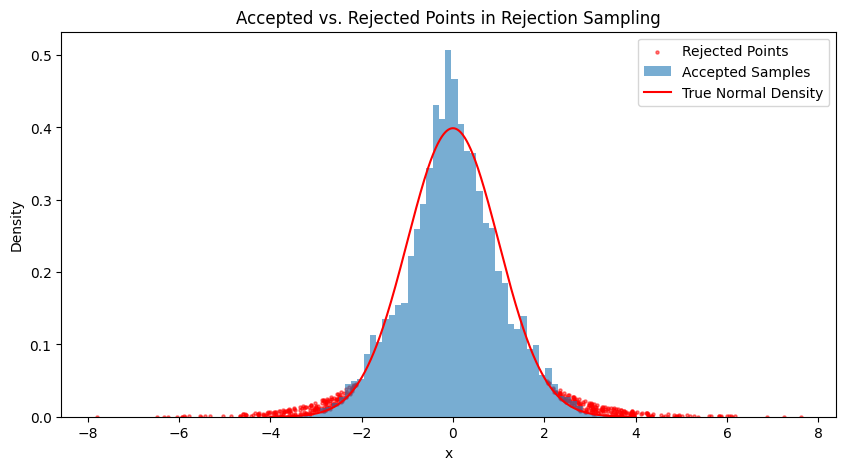

Percentage of rejected points: 7.49%


In [11]:
from scipy.stats import norm, laplace

def f(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Proposal density: Laplace(0,1)
def h(x):
    return 0.5 * np.exp(-abs(x))

# Scaling constant c
c = 2 / np.sqrt(2 * np.pi)  # Approximately 0.797

def rejection_sampling_visualized(n_samples):
    accepted_samples = []
    rejected_samples_x = []
    rejected_samples_y = []

    total_generated = 0  # Counter for total points generated

    while len(accepted_samples) < n_samples:
        x = np.random.laplace(0, 1)  # Sample from Laplace(0,1)
        u = np.random.uniform(0, 1)  # Uniform(0,1) for acceptance step
        threshold = f(x) / (c * h(x))  # Acceptance threshold

        total_generated += 1

        if u <= threshold:
            accepted_samples.append(x)
        else:
            rejected_samples_x.append(x)
            rejected_samples_y.append(u * c * h(x))

    rejection_rate = ((total_generated - n_samples) / total_generated) * 100  # Percentage of rejected points
    return np.array(accepted_samples), np.array(rejected_samples_x), np.array(rejected_samples_y), rejection_rate

n_samples = 5000
accepted, rejected_x, rejected_y, rejection_rate = rejection_sampling_visualized(n_samples)

x_plot = np.linspace(-4, 4, 1000)

plt.figure(figsize=(10, 5))
plt.hist(accepted, bins=50, density=True, alpha=0.6, label="Accepted Samples")

plt.plot(x_plot, f(x_plot), 'r-', label="True Normal Density")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Accepted Samples using Rejection Sampling")

plt.figure(figsize=(10, 5))
plt.scatter(rejected_x, rejected_y, color='red', s=5, alpha=0.5, label="Rejected Points")
plt.hist(accepted, bins=50, density=True, alpha=0.6, label="Accepted Samples")

plt.plot(x_plot, f(x_plot), 'r-', label="True Normal Density")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Accepted vs. Rejected Points in Rejection Sampling")
plt.show()

print(f"Percentage of rejected points: {rejection_rate:.2f}%")


The histogram of accepted samples closely follows the true normal density function.

The rejected points (red dots) are mainly distributed near the tails, where the proposal density is higher than the target density.

Percentage of rejected points: 7.49%

# **EXERCISE- 3**

[[0.33736182 0.2132313  0.1756961  0.1787518  0.09495897]
 [0.14482038 0.20854063 0.19427175 0.30484706 0.14752017]
 [0.13670633 0.11877144 0.09695998 0.11773144 0.52983081]
 [0.14695607 0.36740888 0.30680859 0.17339739 0.00542907]
 [0.04815488 0.28427512 0.0894452  0.28305843 0.29506636]]


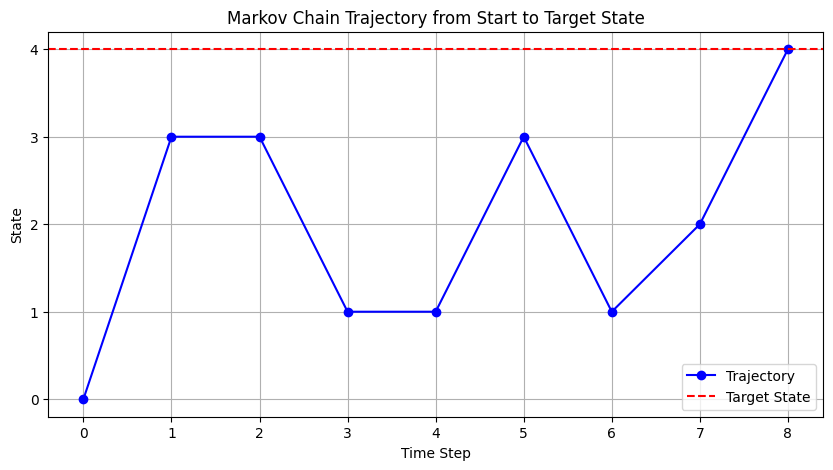

Trajectory from Start to Target: 0 → 3 → 3 → 1 → 1 → 3 → 1 → 2 → 4
Hitting Time: 8 steps
Average Hitting Time over 10000 simulations: 5.82 steps


In [12]:

def generate_stochastic_matrix(n):
    P = np.random.rand(n, n)
    P = P / P.sum(axis=1, keepdims=True)
    return P

def simulate_markov_chain_trajectory(P, start_state, target_state, max_steps=100):
    """Simulates a Markov chain and records the trajectory over time."""
    trajectory = [start_state]
    state = start_state
    for step in range(max_steps):
        if state == target_state:
            return trajectory, step
        state = np.random.choice(len(P), p=P[state])
        trajectory.append(state)
    return trajectory, max_steps

n_states = 5
P = generate_stochastic_matrix(n_states)
print(P)
start_state = 0
target_state = 4

trajectory, hitting_time = simulate_markov_chain_trajectory(P, start_state, target_state)

num_simulations = 10000
hitting_times = [simulate_markov_chain_trajectory(P, start_state, target_state)[1] for _ in range(num_simulations)]

plt.figure(figsize=(10, 5))
plt.plot(range(len(trajectory)), trajectory, marker='o', linestyle='-', color='b', markersize=6, label="Trajectory")
plt.axhline(y=target_state, color='r', linestyle='--', label="Target State")

plt.xlabel("Time Step")
plt.ylabel("State")
plt.yticks(range(n_states))
plt.title("Markov Chain Trajectory from Start to Target State")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(hitting_times, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel(f"Hitting Time to State {target_state}")
plt.ylabel("Frequency")
plt.title("Distribution of Hitting Times")
plt.grid(True)
plt.show()

print("Trajectory from Start to Target:", " → ".join(map(str, trajectory)))
print(f"Hitting Time: {hitting_time} steps")
print(f"Average Hitting Time over {num_simulations} simulations: {np.mean(hitting_times):.2f} steps")


The distribution of hitting times is right-skewed, meaning most processes reach state 4 relatively quickly, but some take much longer.

The frequency decreases as hitting time increases.

# **EXERCISE - 4**

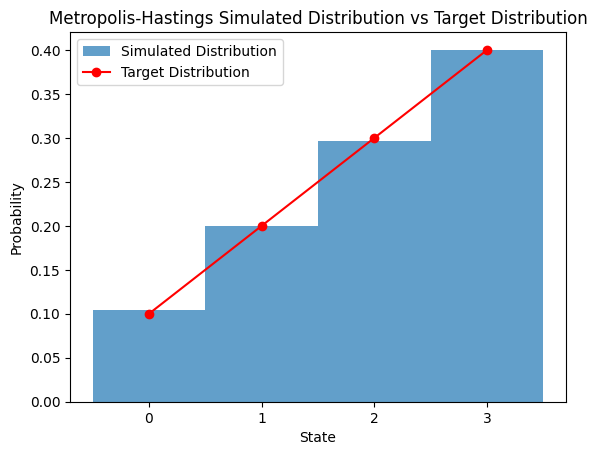

In [9]:
states = np.array([0, 1, 2, 3])

pi = np.array([0.1, 0.2, 0.3, 0.4])

# Proposal transition matrix (random walk on a circle)
p = 0.5  # Probability of moving left or right
P = np.array([[0, p, 0, p],
              [p, 0, p, 0],
              [0, p, 0, p],
              [p, 0, p, 0]])

def metropolis_hastings(num_steps, initial_state):
    chain = [initial_state]
    current_state = initial_state

    for _ in range(num_steps):
        # Propose a new state
        if np.random.rand() < 0.5:
            proposal_state = (current_state - 1) % 4  # Move left
        else:
            proposal_state = (current_state + 1) % 4  # Move right

        # Compute acceptance probability
        a_ij = (pi[proposal_state] * P[proposal_state, current_state]) / (pi[current_state] * P[current_state, proposal_state])
        a_ij = min(1, a_ij)  # Ensure probability is at most 1

        # Accept or reject the proposal
        u = np.random.rand()
        if u <= a_ij:
            current_state = proposal_state

        chain.append(current_state)

    return chain

# Run the Metropolis-Hastings algorithm
num_steps = 10000
initial_state = np.random.choice(states)
chain = metropolis_hastings(num_steps, initial_state)

# Plot the state distribution
plt.hist(chain, bins=np.arange(-0.5, 4.5, 1), density=True, alpha=0.7, label="Simulated Distribution")
plt.plot(states, pi, 'ro-', label="Target Distribution")
plt.xticks(states)
plt.xlabel("State")
plt.ylabel("Probability")
plt.legend()
plt.title("Metropolis-Hastings Simulated Distribution vs Target Distribution")
plt.show()


The simulated distribution and the target distribution match almost perfectly.

The probabilities at each state align well, indicating that the Metropolis-Hastings algorithm has accurately approximated the target distribution.

The small number of states i.e 4 makes it easier for the algorithm to converge quickly.

# **EXERCISE-5**

**π= [0.05,0.07,0.1,0.12,0.15,0.13,0.1,0.08,0.07,0.13]**

<ipython-input-13-695bd0681e1d>:22: RuntimeWarning: invalid value encountered in scalar divide
  a_ij = min(1, (pi[proposal_state] * P[proposal_state, current_state]) / (pi[current_state] * P[current_state, proposal_state]))


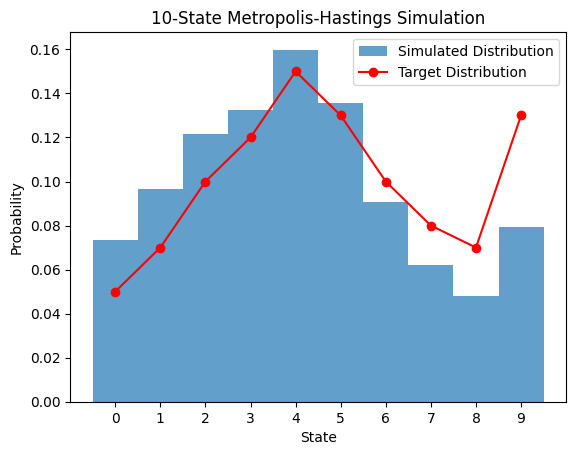

In [13]:
import numpy as np
import matplotlib.pyplot as plt

num_states = 10
states = np.arange(num_states)

pi = np.array([0.05, 0.07, 0.1, 0.12, 0.15, 0.13, 0.1, 0.08, 0.07, 0.13])

P = np.zeros((num_states, num_states))
for i in range(num_states):
    if i > 0:
        P[i, i - 1] = 0.5
    if i < num_states - 1:
        P[i, i + 1] = 0.5

def metropolis_hastings(num_steps, initial_state):
    chain = [initial_state]
    current_state = initial_state

    for _ in range(num_steps):
        proposal_state = (current_state + np.random.choice([-1, 1])) % num_states
        a_ij = min(1, (pi[proposal_state] * P[proposal_state, current_state]) / (pi[current_state] * P[current_state, proposal_state]))
        if np.random.rand() <= a_ij:
            current_state = proposal_state
        chain.append(current_state)

    return chain


num_steps = 20000
chain = metropolis_hastings(num_steps, np.random.choice(states))


plt.hist(chain, bins=np.arange(-0.5, num_states + 0.5, 1), density=True, alpha=0.7, label="Simulated Distribution")
plt.plot(states, pi, 'ro-', label="Target Distribution")
plt.xticks(states)
plt.xlabel("State")
plt.ylabel("Probability")
plt.legend()
plt.title("10-State Metropolis-Hastings Simulation")
plt.show()


**π= normalized [1,2,4,6,5,4,6,8,7,6,5,4,3,2,4,6,8,10,12,15]**

<ipython-input-6-506b1f1c8796>:25: RuntimeWarning: invalid value encountered in scalar divide
  a_ij = min(1, (pi[proposal_state] * P[proposal_state, current_state]) / (pi[current_state] * P[current_state, proposal_state]))


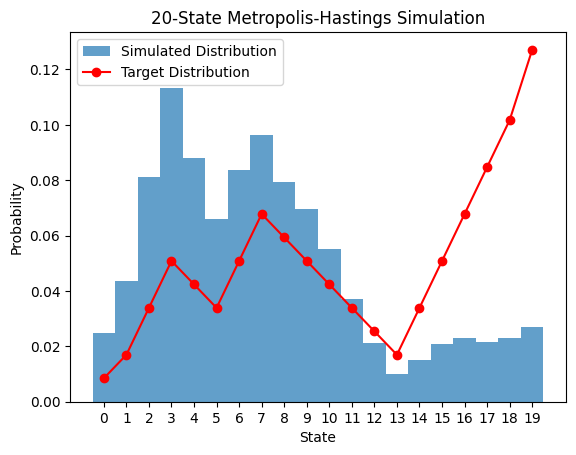

In [7]:
num_states = 20
states = np.arange(num_states)

# Define target distribution and normalize
raw_pi = np.array([1, 2, 4, 6, 5, 4, 6, 8, 7, 6, 5, 4, 3, 2, 4, 6, 8, 10, 12, 15])
pi = raw_pi / np.sum(raw_pi)

# Define proposal transition matrix
P = np.zeros((num_states, num_states))
for i in range(num_states):
    if i > 0:
        P[i, i - 1] = 0.5
    if i < num_states - 1:
        P[i, i + 1] = 0.5

chain = metropolis_hastings(num_steps, np.random.choice(states))

plt.hist(chain, bins=np.arange(-0.5, num_states + 0.5, 1), density=True, alpha=0.7, label="Simulated Distribution")
plt.plot(states, pi, 'ro-', label="Target Distribution")
plt.xticks(states)
plt.xlabel("State")
plt.ylabel("Probability")
plt.legend()
plt.title("20-State Metropolis-Hastings Simulation")
plt.show()


**π=normalized [1,2,3,...,50]**

<ipython-input-6-506b1f1c8796>:25: RuntimeWarning: invalid value encountered in scalar divide
  a_ij = min(1, (pi[proposal_state] * P[proposal_state, current_state]) / (pi[current_state] * P[current_state, proposal_state]))


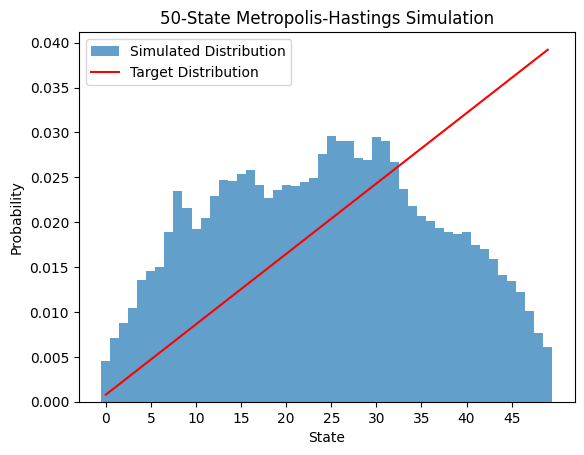

In [8]:
num_states = 50
states = np.arange(num_states)

# Define increasing target distribution
raw_pi = np.arange(1, num_states + 1)
pi = raw_pi / np.sum(raw_pi)

# Define proposal transition matrix
P = np.zeros((num_states, num_states))
for i in range(num_states):
    if i > 0:
        P[i, i - 1] = 0.5
    if i < num_states - 1:
        P[i, i + 1] = 0.5

chain = metropolis_hastings(num_steps, np.random.choice(states))

plt.hist(chain, bins=np.arange(-0.5, num_states + 0.5, 1), density=True, alpha=0.7, label="Simulated Distribution")
plt.plot(states, pi, 'r-', label="Target Distribution")
plt.xticks(states[::5])  # Show every 5th state for readability
plt.xlabel("State")
plt.ylabel("Probability")
plt.legend()
plt.title("50-State Metropolis-Hastings Simulation")
plt.show()


10-State Simulation:

The simulated distribution (blue) closely follows the target distribution (red line) but has some deviations, especially at higher states.

20-State Simulation:

The simulated distribution still approximates the target distribution but has more fluctuations.
There are visible gaps where the simulated probability does not match the target well.

50-State Simulation:

The simulated distribution is more smoothed out compared to the previous cases.
The target distribution appears to be a linear function, whereas the simulated distribution takes a more bell-shaped form.